In [1]:
import pandas as pd                    # pandas is a dataframe library
import matplotlib.pyplot as plt        # matplotlib.pyplot plot data 
import numpy as np           

In [2]:
 df = pd.read_csv("D:\diabetes_csv.csv") 

In [3]:
 df.shape 

(768, 9)

In [4]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [5]:
df.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True
767,1,93,70,31,0,30.4,0.315,23,False


In [6]:
 df.isnull().values.any() 

False

In [7]:
def plot_corr(df, size=10): 
    corr = df.corr()  # data frame corelation function  
    fig , ax = plt.subplots(figsize =(size,size))   
    ax.matshow(corr)  # color code the rectanges by corelation value    
    plt.xticks (range(len(corr.columns)), corr.columns)    # draw x ticks mark   
    plt.yticks (range(len(corr.columns)), corr.columns)    # draw y ticks mark 

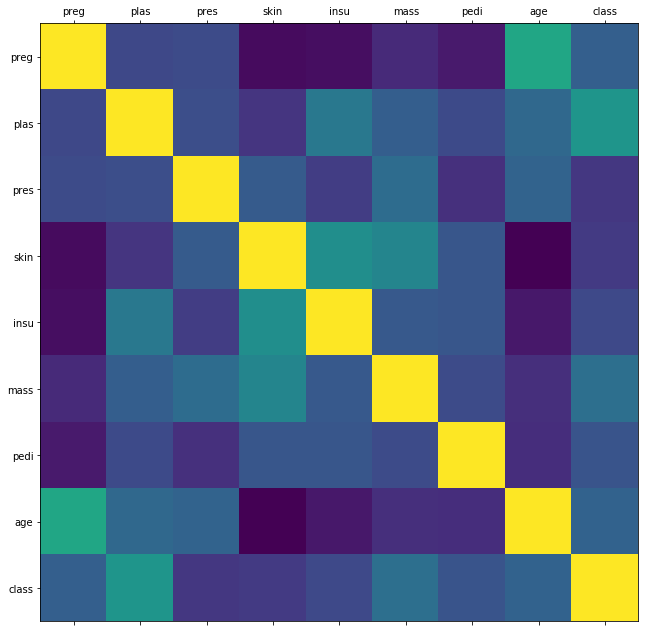

In [8]:
 plot_corr(df) 
    

In [9]:
 df.corr() 

,preg,plas,pres,skin,insu,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
 df.head() 

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [11]:
 class_map = {True:1 , False:0} 

In [12]:
 df['class'] = df['class'].map(class_map)

In [13]:
 df.head(5) 

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
from sklearn.model_selection import train_test_split 
feature_col_names = ['preg', 'plas' , 'pres', 'insu', 'skin', 'mass', 'pedi', 'age']
predicted_class_names = ['class'] 
X = df[feature_col_names].values # predictor feature coloumns ( 8 X m )
y = df[predicted_class_names].values # predicted class ( 1= true , 0=false ) column ( 1 X m )
split_test_size = 0.30 
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)           # test size = 0.30 is 30% , 42 is the answer to everything , any number can be used for ran dom state 


In [15]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


In [16]:
 print ("Origional True: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]),(len(df.loc[df['class'] == 1]) / len(df.index))*100.0)) 
print ("Origional False: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]),(len(df.loc[df['class'] == 0]) / len(df.index))*100.0))
print(" ")
print ("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]),(len(y_train[y_train[:] == 1]) / len(y_train))*100.0))
print ("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]),(len(y_train[y_train[:] == 0]) / len(y_train))*100.0))
print(" ")
print ("Testing True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]),(len(y_test[y_test[:] == 1]) / len(y_test))*100.0)) 
print ("Testing False: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]),(len(y_test[y_test[:] == 0]) / len(y_test))*100.0)) 

Origional True: 268 (34.90%)
Origional False: 500 (65.10%)
 
Training True: 188 (35.01%)
Training False: 349 (64.99%)
 
Testing True: 80 (34.63%)
Testing False: 151 (65.37%)


In [17]:
print("# rows in dataframe {0}".format(len(df))) 
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['plas'] == 0 ]))) 
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['pres'] == 0 ])))
print("# rows missing thickness: {0}".format(len(df.loc[df['skin'] == 0 ]))) 
print("# rows missing insulin: {0}".format(len(df.loc[df['insu'] == 0 ]))) 
print("# rows missing bmi: {0}".format(len(df.loc[df['mass'] == 0 ])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['pedi'] == 0 ]))) 
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0 ]))) 


# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [18]:
from sklearn.preprocessing import Imputer #impute with mean all 0 readings 
fill_0 = Imputer(missing_values = 0 , strategy ="mean", axis=0) 
X_train = fill_0.fit_transform(X_train) 
X_test = fill_0.fit_transform(X_test) 

C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
np.isnan(X)
np.where(np.isnan(X))
np.nan_to_num(X)
pd.DataFrame(X).fillna(1)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,0.0,35.0,33.6,0.627,50.0
1,1.0,85.0,66.0,0.0,29.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,94.0,23.0,28.1,0.167,21.0
4,0.0,137.0,40.0,168.0,35.0,43.1,2.288,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
6,3.0,78.0,50.0,88.0,32.0,31.0,0.248,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
8,2.0,197.0,70.0,543.0,45.0,30.5,0.158,53.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [20]:
from sklearn.naive_bayes import GaussianNB
 # Create Gaussian naive bayes model object and train it with the data  
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
nb_predict_train = nb_model.predict(X_train) 
 # import the performance metrices library
from sklearn import metrics 
 # Accuracy
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print() 

Accuracy : 0.7542



In [22]:
nb_predict_text = nb_model.predict(X_test) 
 # import the performance metrices library
from sklearn import metrics 
 # Accuracy
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_text)))
print() 

Accuracy : 0.7359



In [23]:
print("Confusion Matrix") 
 # the use of labels to set 1=True to upper left and 0=False to lower right 
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_text, labels = [1,0]))) 
print(" ") 
print(" Classification Report ") 
print(metrics.classification_report(y_test, nb_predict_text, labels = [1,0])) 

Confusion Matrix
[[ 52  28]
 [ 33 118]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42) # create random forest object
rf_model.fit(X_train, y_train.ravel()) 

C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
rf_predict_train = rf_model.predict(X_train) # training metrics 
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train))) 
print() 

Accuracy : 0.9907



In [27]:
rf_predict_test = rf_model.predict(X_test) # training metrics 
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print() 

Accuracy : 0.7576



In [28]:
print("Confusion Matrix") 
 # the use of labels to set 1=True to upper left and 0=False to lower right 
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1,0])))
print(" ") 
print(" Classification Report ")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0])) 

Confusion Matrix
[[ 51  29]
 [ 27 124]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.65      0.64      0.65        80
           0       0.81      0.82      0.82       151

   micro avg       0.76      0.76      0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [29]:
from sklearn.linear_model import LogisticRegression 
lr_model = LogisticRegression(C=0.7, random_state=42) # create random forest object
lr_model.fit(X_train, y_train.ravel()) 

C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lr_predict_test = lr_model.predict(X_test) # training metrics 
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

Accuracy : 0.7446



In [31]:
print("Confusion Matrix") 
 # the use of labels to set 1=True to upper left and 0=False to lower right 
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1,0])))
print(" ") 
print(" Classification Report ")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1,0])) 

Confusion Matrix
[[ 44  36]
 [ 23 128]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.66      0.55      0.60        80
           0       0.78      0.85      0.81       151

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

1st max value of 0.613 occured at c=1.400


Text(0, 0.5, 'recall score')

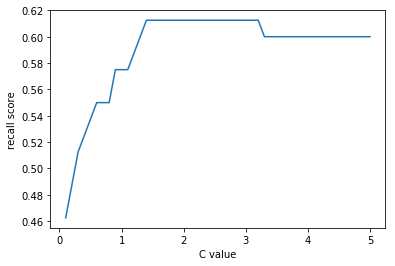

In [41]:
C_start = 0.1
C_end = 5 
C_inc = 0.1 


C_values, recall_scores = [] , []
C_val = C_start 
best_recall_score = 0 

while (C_val < C_end): 
    C_values.append(C_val)   
    lr_model_loop = LogisticRegression(C=C_val , random_state=42)   
    lr_model_loop.fit(X_train , y_train.ravel())  
    lr_predict_loop_test = lr_model_loop.predict(X_test)  
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)  
    recall_scores.append(recall_score)  
    if (recall_score > best_recall_score):    
        best_recall_score = recall_score      
        best_lr_predict_test = lr_predict_loop_test        
       
    C_val = C_val + C_inc  
       
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at c={1:.3f}".format(best_recall_score,best_score_C_val)) 

%matplotlib inline 
plt.plot(C_values , recall_scores, "-")
plt.xlabel("C value") 
plt.ylabel("recall score") 
 

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced' , C=best_score_C_val, random_state=42)  
lr_model.fit(X_train, y_train.ravel()) 

C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
lr_predict_test = lr_model.predict(X_test) # training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print() 

Accuracy : 0.7143



In [37]:
print("Confusion Matrix") 
 # the use of labels to set 1=True to upper left and 0=False to lower right 
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1,0])))
print(" ") 
print(" Classification Report ") 
print(metrics.classification_report(y_test, lr_predict_test, labels = [1,0])) 

Confusion Matrix
[[ 59  21]
 [ 45 106]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.57      0.74      0.64        80
           0       0.83      0.70      0.76       151

   micro avg       0.71      0.71      0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



In [38]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight='balanced') 
lr_cv_model.fit(X_train, y_train.ravel()) 

C:\Users\Vadhana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [39]:
lr_cv_predict_test = lr_cv_model.predict(X_test) # training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test))) 
print()

Accuracy : 0.7013



In [40]:
print("Confusion Matrix") 
 # the use of labels to set 1=True to upper left and 0=False to lower right 
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1,0])))
print(" ") 
print(" Classification Report ") 
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1,0]))

Confusion Matrix
[[ 53  27]
 [ 42 109]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.56      0.66      0.61        80
           0       0.80      0.72      0.76       151

   micro avg       0.70      0.70      0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

